# Recurrent Neural Networks

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Time series forecasting

In [2]:
df = pd.read_csv('../data/ZonalDemands_2003-2016.csv',
#                  skiprows=6, skipfooter=9,
                 engine='python')
df.head()

,Date,Hour,Total Ontario,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Tot Zones,diff
0,01-May-03,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163
1,01-May-03,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100
2,01-May-03,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123
3,01-May-03,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89
4,01-May-03,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78


In [3]:
df = df.set_index(df.apply(lambda row: (pd.to_datetime(row['Date']) + pd.Timedelta("%d hours" % row['Hour'])),axis=1))

In [4]:
from pandas.tseries.offsets import MonthEnd

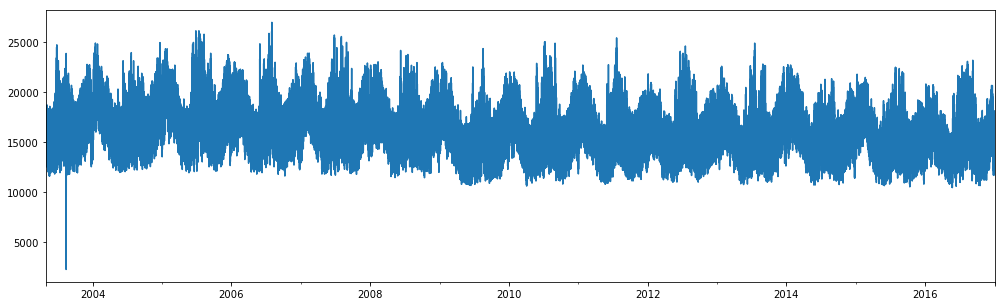

In [5]:
df['Total Ontario'].plot(figsize=(17,5))

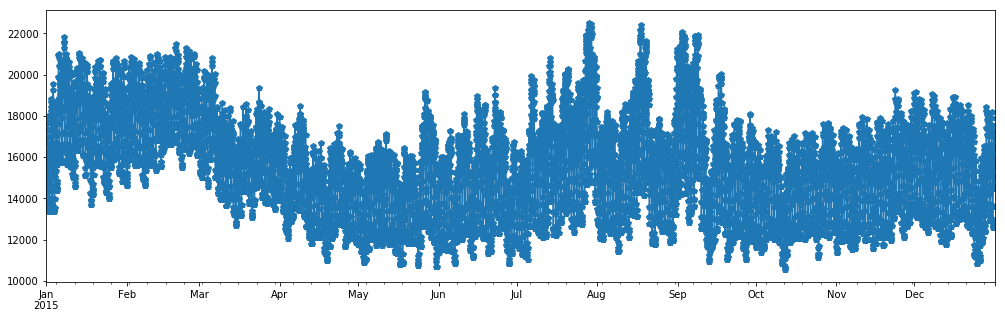

In [6]:
df['2015-01-01':'2015-12-31']['Total Ontario'].plot(style='p-', figsize=(17,5))

In [7]:
split_date = pd.Timestamp('01-01-2014')

In [8]:
train = df.loc[:split_date, ['Total Ontario']]
test = df.loc[split_date:, ['Total Ontario']]

In [9]:
train.shape, test.shape

((93552, 1), (26305, 1))

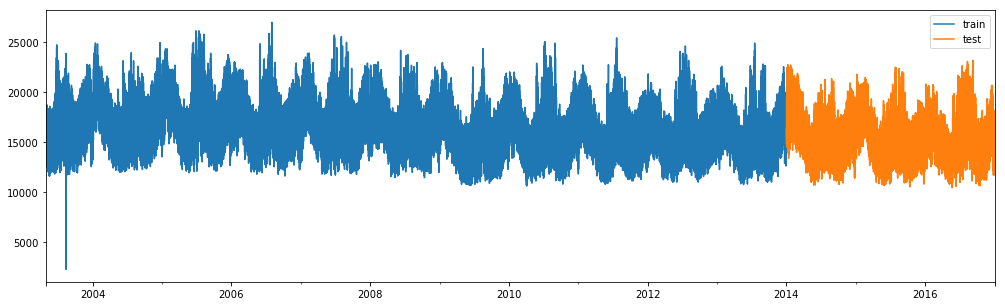

In [10]:
ax = train.plot(figsize=(17,5))
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [12]:
train_sc[:4]

array([[ 0.4621791 ],
       [ 0.45716596],
       [ 0.45041439],
       [ 0.45405296]])

In [13]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((93551, 1), (93551, 1), (26304, 1), (26304, 1))

### Fully connected predictor

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [16]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [17]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [18]:
model.fit(X_train, y_train, epochs=200,
          batch_size=500, verbose=1,
          callbacks=[early_stop])

Epoch 1/200
93551/93551 [==============================] - 0s - loss: 0.0915     
Epoch 2/200
93551/93551 [==============================] - 0s - loss: 0.0047     
Epoch 3/200
93551/93551 [==============================] - 0s - loss: 0.0029     
Epoch 4/200
93551/93551 [==============================] - 0s - loss: 0.0027     
Epoch 5/200
93551/93551 [==============================] - 0s - loss: 0.0026     
Epoch 6/200
93551/93551 [==============================] - 0s - loss: 0.0024     
Epoch 7/200
93551/93551 [==============================] - 0s - loss: 0.0023     
Epoch 8/200
93551/93551 [==============================] - 0s - loss: 0.0021     
Epoch 9/200
93551/93551 [==============================] - 0s - loss: 0.0019     
Epoch 10/200
93551/93551 [==============================] - 0s - loss: 0.0017     
Epoch 11/200
93551/93551 [==============================] - 0s - loss: 0.0016     
Epoch 12/200
93551/93551 [==============================] - 0s - loss: 0.0014     
Epoch 13/200


In [19]:
y_pred = model.predict(X_test)

(1200, 1300)

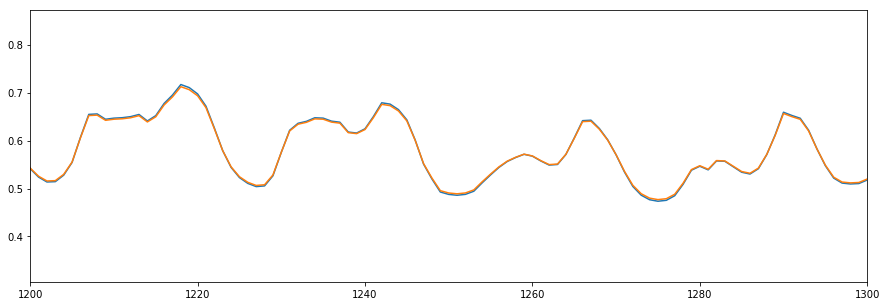

In [20]:
plt.figure(figsize=(15,5))
plt.plot(y_test[:])
plt.plot(y_pred[1:])
plt.xlim(1200,1300)

In [21]:
fc_res = y_pred - y_test

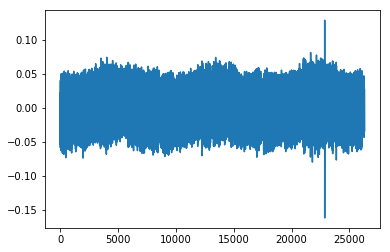

In [22]:
plt.plot(fc_res)

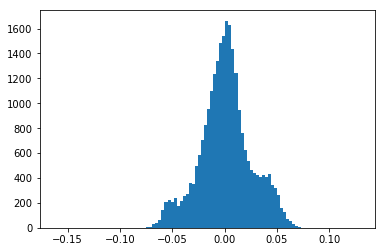

In [23]:
_ = plt.hist(fc_res, bins=100)

In [24]:
def mse(res):
    return np.square(res).sum()/ len(res)

In [25]:
mse(fc_res)

0.00061057958214733878

### Recurrent predictor

In [26]:
from keras.layers import LSTM

In [27]:
X_train.shape

(93551, 1)

In [28]:
y_train_t = y_train[:-1, None]#.reshape([50, 1871])

In [29]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [30]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(None, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=500, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
93551/93551 [==============================] - 3s - loss: 0.1744     
Epoch 2/100
93551/93551 [==============================] - 2s - loss: 0.0131     
Epoch 3/100
93551/93551 [==============================] - 1s - loss: 0.0057     
Epoch 4/100
93551/93551 [==============================] - 2s - loss: 0.0053     
Epoch 5/100
93551/93551 [==============================] - 1s - loss: 0.0049     
Epoch 6/100
93551/93551 [==============================] - 1s - loss: 0.0045     
Epoch 7/100
93551/93551 [==============================] - 1s - loss: 0.0040     
Epoch 8/100
93551/93551 [==============================] - 2s - loss: 0.0035     
Epoch 9/100
93551/93551 [==============================] - 2s - loss: 0.0030     
Epoch 10/100
93551/93551 [==============================] - 2s - loss: 0.0025     
Epoch 11/100
93551/93551 [==============================] - 2s - loss: 0.0020     
Epoch 12/100
93551/93551 [==============================] - 1s - loss: 0.0016     
Epoch 13/100


In [32]:
y_pred_lstm = model.predict(X_test_t)

(1200, 1300)

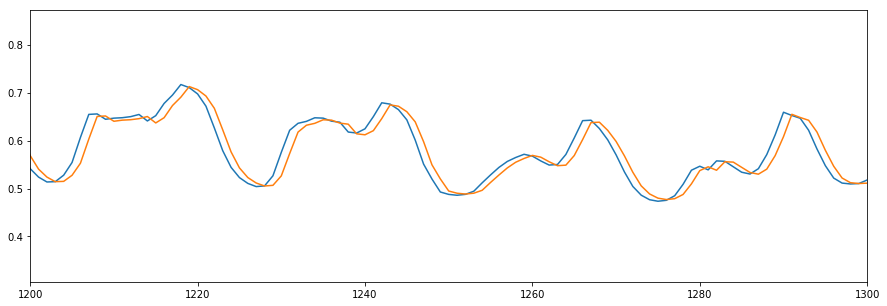

In [33]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_pred_lstm)
plt.xlim(1200,1300)

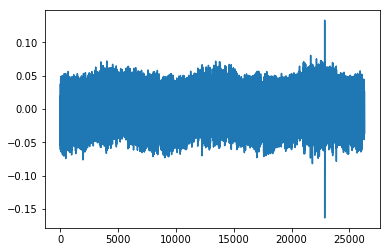

In [34]:
plt.plot(y_pred_lstm - y_test)

In [35]:
mse(y_pred_lstm - y_test)

0.00061558516761842607

(22800, 22900)

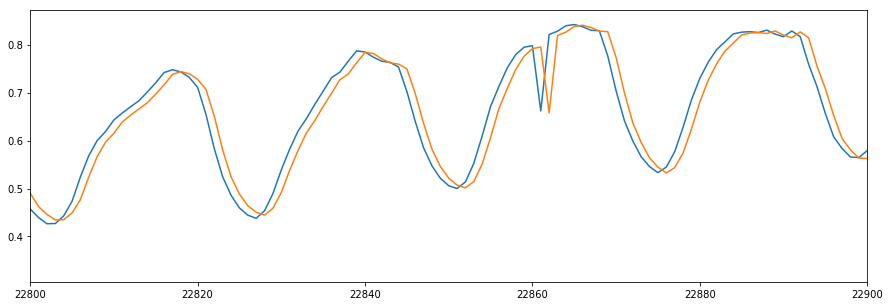

In [36]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_pred_lstm)
plt.xlim(22800,22900)

## Windows

In [37]:
train_sc.shape

(93552, 1)

In [38]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
2003-05-01 01:00:00,0.462179
2003-05-01 02:00:00,0.457166
2003-05-01 03:00:00,0.450414
2003-05-01 04:00:00,0.454053
2003-05-01 05:00:00,0.474631


In [39]:
window_size = 24

In [40]:
for s in range(window_size):
    train_sc_df['shift_{}'.format(s+1)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s+1)] = test_sc_df['Scaled'].shift(s)

In [41]:
train_sc_df.head(window_size)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24
2003-05-01 01:00:00,0.462179,0.462179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 02:00:00,0.457166,0.457166,0.462179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 03:00:00,0.450414,0.450414,0.457166,0.462179,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 04:00:00,0.454053,0.454053,0.450414,0.457166,0.462179,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 05:00:00,0.474631,0.474631,0.454053,0.450414,0.457166,0.462179,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 06:00:00,0.519224,0.519224,0.474631,0.454053,0.450414,0.457166,0.462179,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 07:00:00,0.585890,0.585890,0.519224,0.474631,0.454053,0.450414,0.457166,0.462179,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 08:00:00,0.626562,0.626562,0.585890,0.519224,0.474631,0.454053,0.450414,0.457166,0.462179,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 09:00:00,0.637437,0.637437,0.626562,0.585890,0.519224,0.474631,0.454053,0.450414,0.457166,0.462179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01 10:00:00,0.643663,0.643663,0.637437,0.626562,0.585890,0.519224,0.474631,0.454053,0.450414,0.457166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1).values
y_train = train_sc_df.dropna()[['Scaled']].values

X_test = test_sc_df.dropna().drop('Scaled', axis=1).values
y_test = test_sc_df.dropna()[['Scaled']].values

In [43]:
X_train.shape

(93529, 24)

### Fully Connected on Windows

In [44]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=window_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train, y_train, epochs=200,
          batch_size=500, verbose=1, callbacks=[early_stop])

Epoch 1/200
93529/93529 [==============================] - 0s - loss: 0.0186     
Epoch 2/200
93529/93529 [==============================] - 0s - loss: 0.0041     
Epoch 3/200
93529/93529 [==============================] - 0s - loss: 0.0014     
Epoch 4/200
93529/93529 [==============================] - 0s - loss: 7.9241e-04     
Epoch 5/200
93529/93529 [==============================] - 0s - loss: 5.2222e-04     
Epoch 6/200
93529/93529 [==============================] - 0s - loss: 3.7866e-04     
Epoch 7/200
93529/93529 [==============================] - 0s - loss: 3.0412e-04     
Epoch 8/200
93529/93529 [==============================] - 0s - loss: 2.5963e-04     
Epoch 9/200
93529/93529 [==============================] - 0s - loss: 2.2588e-04     
Epoch 10/200
93529/93529 [==============================] - 0s - loss: 1.9694e-04     
Epoch 11/200
93529/93529 [==============================] - 0s - loss: 1.7042e-04     
Epoch 12/200
93529/93529 [==============================] - 0s -

In [46]:
y_pred_fc_window = model.predict(X_test)

(1200, 1300)

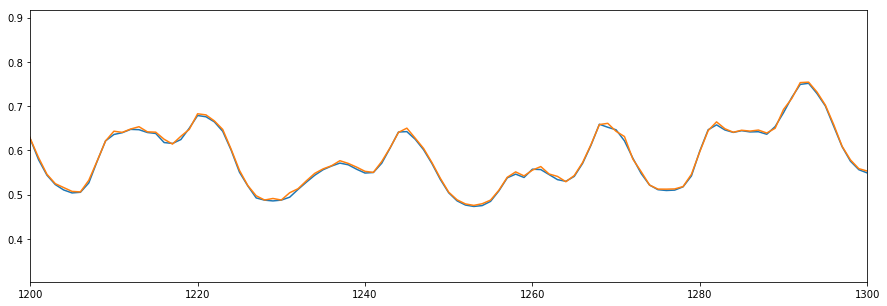

In [47]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_pred_fc_window)
plt.xlim(1200,1300)

In [48]:
res_fcw = y_pred_fc_window - y_test

In [49]:
mse(res_fcw)

1.5294648401464424e-05

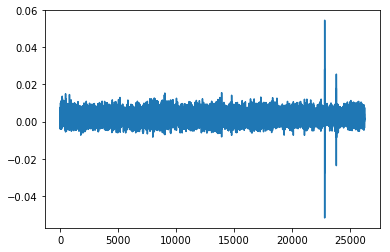

In [50]:
plt.plot(res_fcw)

(22800, 22900)

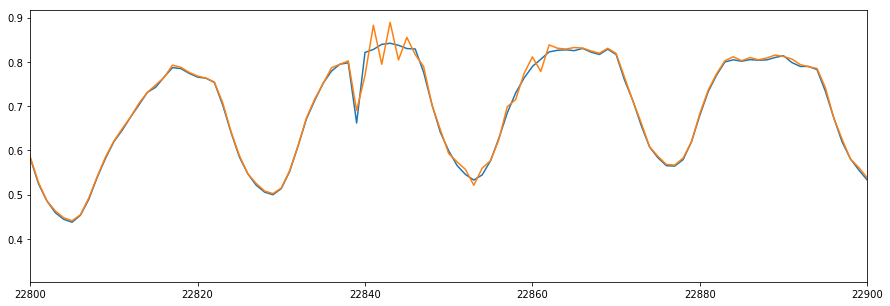

In [51]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_pred_fc_window)
plt.xlim(22800,22900)

### LSTM on Windows

In [52]:
X_train_t = X_train.reshape(X_train.shape[0], 1, window_size)
X_test_t = X_test.reshape(X_test.shape[0], 1, window_size)

In [53]:
X_train_t.shape

(93529, 1, 24)

In [54]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, window_size)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 744       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=500, verbose=1, callbacks=[early_stop])

Epoch 1/100
93529/93529 [==============================] - 3s - loss: 0.0447     
Epoch 2/100
93529/93529 [==============================] - 2s - loss: 0.0018     
Epoch 3/100
93529/93529 [==============================] - 2s - loss: 9.3688e-04     
Epoch 4/100
93529/93529 [==============================] - 2s - loss: 6.3677e-04     
Epoch 5/100
93529/93529 [==============================] - 2s - loss: 5.7462e-04     
Epoch 6/100
93529/93529 [==============================] - 2s - loss: 5.4450e-04     
Epoch 7/100
93529/93529 [==============================] - 2s - loss: 5.1907e-04     
Epoch 8/100
93529/93529 [==============================] - 2s - loss: 4.9387e-04     
Epoch 9/100
93529/93529 [==============================] - 2s - loss: 4.6784e-04     
Epoch 10/100
93529/93529 [==============================] - 2s - loss: 4.3919e-04     
Epoch 11/100
93529/93529 [==============================] - 2s - loss: 4.0934e-04     
Epoch 12/100
93529/93529 [==============================] - 

In [ ]:
y_pred_lstm_window = model.predict(X_test_t)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_pred_lstm_window)
plt.xlim(1200,1300)

In [ ]:
plt.plot(y_pred_lstm_window - y_test)

In [ ]:
lstw_res = y_pred_lstm_window - y_test

In [ ]:
np.square(lstw_res).sum()/ len(lstw_res)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_pred_lstm_window - y_test)
plt.xlim(22800,22900)

In [ ]:
_ = plt.hist(y_pred_lstm_window - y_test, bins=200)
plt.xlim(-0.005,0.005)

In [ ]:
residuals_4 = y_pred_lstm_window - y_test

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test)
plt.plot(y_pred_lstm_window)
plt.xlim(22800,22900)

## Exercise 1

In the model above we reshaped the input shape to: `(num_samples, 1, 12)`, i.e. we treated a window of 12 months as a vector of 12 coordinates that we simultaneously passed to all the LSTM nodes. An alternative way to look at the problem is to reshape the input to `(num_samples, 12, 1)`. This means we consider each input window as a sequence of 12 values that we will pass in sequence to the LSTM. In principle this looks like a more accurate description of our situation. But does it yield better predictions? Let's check it.

- Reshape `X_train` and `X_test` so that they represent a set of univariate sequences
- retrain the same LSTM(6) model, you'll have to adapt the `input_shape`
- check the performance of this new model, is it better at predicting the test data?

In [ ]:
X_train_ts = X_train.reshape(X_train.shape[0], window_size, 1)
X_test_ts = X_test.reshape(X_test.shape[0], window_size, 1)

In [ ]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(window_size, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(X_train_ts, y_train, epochs=100,
          batch_size=10000, verbose=1, callbacks=[early_stop])

In [ ]:
plt.figure(figsize=(15,5))
plt.xlim(3200,3250)
plt.plot(y_test)
plt.plot(y_pred)

## Exercise 2

RNN models can be applied to images too. In general we can apply them to any data where there's a connnection between nearby units. Let's see how we can easily build a model that works with images.

- Load the MNIST data, by now you should be able to do it blindfolded :)
- reshape it so that an image looks like a long sequence of pixels
- create a recurrent model and train it on the training data
- how does it perform compared to a fully connected? How does it compare to Convolutional Neural Networks?

(feel free to run this exercise on a cloud GPU if it's too slow on your laptop)

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)